# Simulated Active Learning Methods
## Libraries

In [1]:
#Standard
import asyncio
from os import getcwd, path
#External
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import BayesianRidge
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

#Custom
from modules.custom import split, getPI

NameError: name 'DataFrame' is not defined

## Standard Data Retrival

In [ ]:
dataRoute = path.join(getcwd(), 'data', 'chembl', 'Additional_datasets')
dataSets = [pd.read_csv(path.join(dataRoute, 'data_CHEMBL313.csv')),
            pd.read_csv(path.join(dataRoute, 'data_CHEMBL2637.csv')),
            pd.read_csv(path.join(dataRoute, 'data_CHEMBL4124.csv'))]

data = dataSets[1].sample(frac=1, random_state=5)



,molecule_id,pXC50,b0001,b0002,b0003,b0004,b0005,b0006,b0007,b0008,...,b1015,b1016,b1017,b1018,b1019,b1020,b1021,b1022,b1023,b1024
831,CHEMBL2070413,4.523,1,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
34,CHEMBL1088633,6.750,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366,CHEMBL1520998,5.159,1,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
439,CHEMBL1577147,4.654,1,0,1,1,1,1,1,0,...,0,0,1,0,0,0,1,0,0,0
15,CHEMBL1082865,4.800,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,CHEMBL1287944,5.678,1,1,1,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0
1142,CHEMBL554276,5.699,1,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
998,CHEMBL31965,5.407,1,1,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
206,CHEMBL1370293,4.545,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Single Model, Least Certain

In [ ]:
## Model Selection is not being tested here, so linear regression is used for speed
X_known, Y_known, X_unknown, Y_unknown, X_test, Y_test = split(data)
pipe = Pipeline([('model', BayesianRidge())])

pipe.fit(X_known, Y_known)
pred_y, std_y = pipe.predict(X_unknown, return_std=True)
std_y.sort_values()

407     0.774848
1148    0.775389
249     0.775529
462     0.775943
384     0.776599
          ...   
830     0.964804
816     0.967605
700     0.974264
829     0.986200
811     0.986200
Length: 1069, dtype: float64

20 of 20

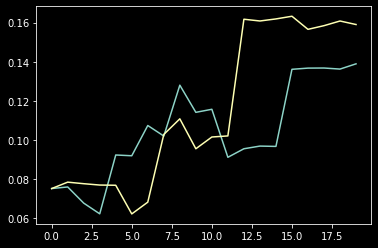

In [ ]:
score1 = []
score2 = []
additional = 20

for i in range(additional):
    print(f"\r{i+1} of {additional}", end="")
    x1, y1, _, _, _, _ = split(data, 20 + i)
    pipe.fit(x1, y1)
    score1.append(pipe.score(X_test, Y_test))

for i in range(additional):
    print(f"\r{i+1} of {additional}", end="")
    pipe.fit(X_known, Y_known)
    pred_y, std_y = pipe.predict(X_unknown, return_std=True)
    index = std_y.sort_values()
    score2.append(pipe.score(X_test, Y_test))
    X_known, Y_known, X_unknown, Y_unknown = getPI((X_known, Y_known), (X_unknown, Y_unknown), index.index[-1], data)

plt.plot(score1)
plt.plot(score2)


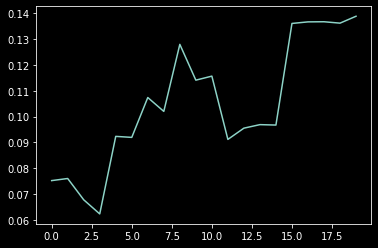

In [ ]:
plt.plot(score1)

## Different Models

In [ ]:
X_known, Y_known, X_unknown, Y_unknown, X_test, Y_test = split(data)
pipes = [Pipeline([('model', MultinomialNB())]),
         Pipeline([('model', SVC())]),
         Pipeline([('model', GaussianNB())])]




for pipe in pipes:
    pipe.fit(X_known, Y_known)
    print(pipe.predict_proba(X_unknown))

ValueError: Unknown label type: (array([4.523, 6.75 , 5.159, 4.654, 4.8  , 5.398, 4.861, 8.222, 5.375,
       8.301, 6.187, 4.8  , 7.102, 7.   , 6.137, 5.   , 6.699, 4.425,
       4.251, 6.678]),)

In [ ]:
pipe

Pipeline(steps=[('model', MultinomialNB())])